In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize':(6,3)}, style='whitegrid')

In [2]:
data = pd.read_csv('Police shootings.txt')

In [3]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [4]:
data.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [5]:
data.isna().sum()

id                            0
name                        417
date                          0
manner_of_death               0
armed                       209
age                         482
gender                       20
race                       1460
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
longitude                   837
latitude                    837
is_geocoding_exact            0
dtype: int64

In [6]:
# Есть ли среди жертв и мужчины и женщины?

data.gender.value_counts()

M    7361
F     348
Name: gender, dtype: int64

Наблюдение:

Да, пострадавшие мужского и женского пола.

In [7]:
# Распределение пострадавших по полу и расам

data.groupby(['gender', 'race'])['race'].count()

gender  race
F       A          7
        B         58
        H         33
        N          5
        O          3
        W        188
M       A        106
        B       1627
        H       1095
        N         92
        O         44
        W       3009
Name: race, dtype: int64

Наблюдения:

1. Большая по численности группа состоит из людей, относящихся к расе White non-Hispanic, вторую по численности группу занимают люди расы Black;
2. Обе эти группы состоят из мужчин.

In [8]:
# Статистика по возрасту общей популяции пострадавших

data.groupby(['gender', 'race'])['age'].describe()

count       mean        std   min    25%   50%    75%   max
gender race                                                              
F      A        6.0  43.666667   8.238123  30.0  39.50  48.0  49.00  50.0
       B       58.0  34.034483  11.721873  16.0  26.25  31.0  39.00  72.0
       H       32.0  32.468750  10.728269  16.0  26.50  30.5  37.25  62.0
       N        5.0  31.200000   6.220932  23.0  27.00  32.0  36.00  38.0
       O        3.0  25.000000   2.645751  22.0  24.00  26.0  26.50  27.0
       W      185.0  39.805405  13.170495  12.0  30.00  39.0  49.00  91.0
M      A      104.0  36.038462  12.035484  15.0  27.00  35.0  44.25  62.0
       B     1590.0  32.804403  11.352529  13.0  24.00  31.0  39.00  88.0
       H     1065.0  33.647887  10.762253  13.0  26.00  33.0  40.00  80.0
       N       91.0  32.615385   9.208413  14.0  26.00  32.0  38.00  58.0
       O       43.0  33.139535  10.624727  18.0  26.00  30.0  39.00  59.0
       W     2961.0  40.081054  13.118593   6.0  30.00  38.0  49.00  91.0

<AxesSubplot:ylabel='Frequency'>

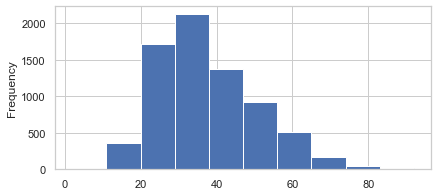

In [9]:
data.age.plot(kind="hist")

Наблюдения:

1. В большинстве групп минимальный возраст жертв не достигает 18 лет. С чем это может быть связано? Пострадавшими стали дети, попавшие в перестрелку, или это неверные данные по людям? Могут ли они быть несовершеннолетними преступниками?
2. В некоторых группах максимальный возраст жерт больше 70 лет. Пострадавшими стали пожилые люди?

### Анализ пострадавших в перестрелке детей (до 12 лет)

In [10]:
# Рассмотрим пострадавших детей (до 12 лет)

children = data[data['age'] < 12]
children

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
833,834,Jeremy Mardis,2015-11-03,shot,unarmed,6.0,M,W,Marksville,LA,False,other,Car,True,-92.050,31.125,True
2899,2900,Kameron Prescott,2017-12-21,shot,unarmed,6.0,M,W,Schertz,TX,False,other,Not fleeing,False,-98.257,29.552,True
6644,6645,Fanta Bility,2021-08-27,shot,unarmed,8.0,F,NaN,Sharon Hill,PA,False,other,Not fleeing,False,-75.269,39.908,True
7240,7241,Clesslynn Jane Crawford,2022-03-26,shot,unarmed,2.0,F,NaN,Baxter Springs,KS,False,other,NaN,False,-94.736,37.024,True


Наблюдения:

1. Пострадавшие были застрелены;
2. Пострадавшие были женского и мужского пола;
3. Психических отклонений у пострадавших не наблюдалось;
4. Все были без оружия, и уровень угрозы со стороны пострадавшего низкий (other). 

Можно предположить, что они, дейстивтельно, были детьми, случайно попавшими в перестрелку.

### Анализ пострадавших подростков (до 18 лет)

In [11]:
# Пострадавшие подростки (до 18 лет).

teenager = data[(data['age'] < 18) & (data['age'] >= 12)]
teenager.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
51,52,Kristiana Coignard,2015-01-22,shot and Tasered,knife,17.0,F,W,Longview,TX,True,other,Not fleeing,False,-94.746,32.495,True
60,61,Jessie Hernandez,2015-01-26,shot,vehicle,17.0,F,H,Denver,CO,False,other,Not fleeing,False,-104.909,39.754,True
77,78,Jacob Haglund,2015-02-02,shot,gun,17.0,M,W,Bay City,MI,False,attack,Not fleeing,False,-83.873,43.599,True
110,111,Jason C. Hendrix,2015-02-14,shot,gun,16.0,M,W,Essex,MD,True,attack,Car,False,-76.440,39.299,True
134,135,A'Donte Washington,2015-02-23,shot,gun,16.0,M,B,Millbrook,AL,False,attack,Not fleeing,False,-86.362,32.530,True


In [12]:
# Какой средний возраст пострадавших в перестрелке подростков?

teenager['age'].mean()

16.136

<AxesSubplot:xlabel='gender', ylabel='age'>

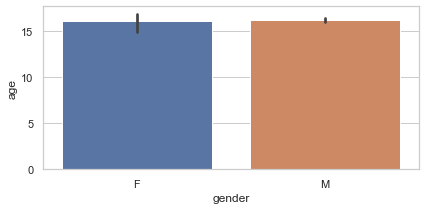

In [13]:
# Средний возраст парней и девушек пострадавших во время перестрелок.

sns.barplot(x='gender', y='age', data=teenager)

Наблюдение:

Средний возраст подростков обоих полов примерно одинаковый.

In [14]:
clean_teenager = teenager[['gender', 'armed', 'race', 'signs_of_mental_illness', 'threat_level', 'manner_of_death']]
clean_teenager.head()

,gender,armed,race,signs_of_mental_illness,threat_level,manner_of_death
51,F,knife,W,True,other,shot and Tasered
60,F,vehicle,H,False,other,shot
77,M,gun,W,False,attack,shot
110,M,gun,W,True,attack,shot
134,M,gun,B,False,attack,shot


In [15]:
obj = teenager[['gender', 'armed', 'race', 'signs_of_mental_illness', 'threat_level', 'manner_of_death']].describe().T
obj

,count,unique,top,freq
gender,124,2,M,114
armed,120,13,gun,56
race,110,5,B,43
signs_of_mental_illness,125,2,False,105
threat_level,125,3,attack,69
manner_of_death,125,2,shot,118


In [16]:
df=pd.DataFrame(obj,columns=["count", "freq", "ratio"])
values=df['freq']/df['count']*100
df["ratio"]=values
df

,count,freq,ratio
gender,124,114,91.935484
armed,120,56,46.666667
race,110,43,39.090909
signs_of_mental_illness,125,105,84.0
threat_level,125,69,55.2
manner_of_death,125,118,94.4


<AxesSubplot:xlabel='race', ylabel='count'>

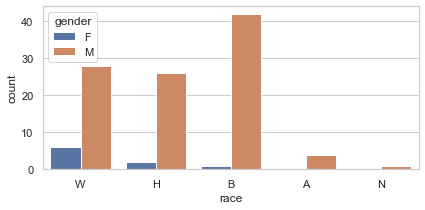

In [17]:
# Диаграмма по количеству пострадавших подростков, принадлежащих разным расам.

sns.countplot(x='race', data=teenager, hue='gender')

In [18]:
# Какой вид оружия использовался чаще?

pd.crosstab(teenager.armed,data.gender,margins=True).style.background_gradient(cmap='summer_r')

gender,F,M,All
armed,,,
BB gun,0,1,1
crowbar,0,1,1
gun,1,55,56
gun and knife,0,1,1
gun and vehicle,0,1,1
knife,2,14,16
machete,0,1,1
pair of scissors,0,1,1
toy weapon,2,11,13


Наблюдения:

1. в 91.9% случаев пострадавшими были парни;
2. в 46.7% случаев они были вооружены настоящим пистолетом, были и те, кто был вооружен игрушечным оружием. Судя по данным, разнообразие оружия было достаточно большим;
3. в 39.1% случаев они относились к расе Black;
4. в 84.0% случаев они были без психических отклонений;
5. в 55.2% случаев уровень угрозы со стороны жертв перестрелки был наивысший (attack);
6. в 94.4% случаев они были затрелены.

С одной сторны, по полученным данным можно предположить, что расизм здесь мог играть какую-то роль. Но ведь и уровень агресси от этих людей был высокий, что провоцировало полицейских защищаться перестрелкой.  

### Анализ пострадавших людей пожилого возраста (больше 65 лет)

In [19]:
elderly = data[data['age'] > 65]
elderly.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
19,20,Jimmy Foreman,2015-01-09,shot,gun,71.0,M,W,England,AR,False,attack,Not fleeing,False,-91.966,34.542,True
29,30,Talbot Schroeder,2015-01-14,shot,knife,75.0,M,W,Old Bridge,NJ,False,attack,Not fleeing,False,-74.301,40.405,True
30,31,Robert Edwards,2015-01-14,shot,gun,68.0,M,W,Lake Jackson,TX,False,attack,Not fleeing,False,-95.428,29.031,True
43,44,Carter Castle,2015-01-18,shot and Tasered,gun,67.0,M,W,Gunlock,KY,True,attack,Not fleeing,False,-82.921,37.565,True
61,62,Raymond Kmetz,2015-01-26,shot,gun,68.0,M,W,New Hope,MN,True,attack,Not fleeing,False,-93.386,45.036,True


In [20]:
clean_elderly = elderly[['gender', 'armed', 'race', 'signs_of_mental_illness', 'threat_level', 'manner_of_death']]
clean_elderly.head()

,gender,armed,race,signs_of_mental_illness,threat_level,manner_of_death
19,M,gun,W,False,attack,shot
29,M,knife,W,False,attack,shot
30,M,gun,W,False,attack,shot
43,M,gun,W,True,attack,shot and Tasered
61,M,gun,W,True,attack,shot


In [21]:
objt = elderly[['gender', 'armed', 'race', 'signs_of_mental_illness', 'threat_level', 'manner_of_death']].describe().T
objt

,count,unique,top,freq
gender,200,2,M,191
armed,199,15,gun,164
race,142,3,W,110
signs_of_mental_illness,201,2,False,137
threat_level,201,3,attack,143
manner_of_death,201,2,shot,198


In [22]:
df=pd.DataFrame(objt,columns=["count", "freq", "ratio"])
values=df['freq']/df['count']*100
df["ratio"]=values
df

,count,freq,ratio
gender,200,191,95.5
armed,199,164,82.41206
race,142,110,77.464789
signs_of_mental_illness,201,137,68.159204
threat_level,201,143,71.144279
manner_of_death,201,198,98.507463


<AxesSubplot:xlabel='race', ylabel='count'>

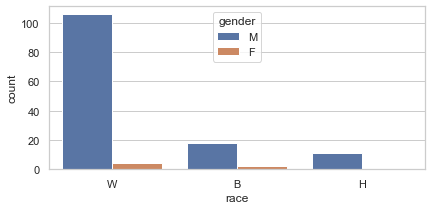

In [23]:
# Диаграмма распределения, пострадавших во время перестрелок, пожилых людей, принадлежащих разным расам.

sns.countplot(x='race', data=elderly, hue='gender')

Наблюдения:

1. в 92.6% случаев пострадавшими были мужчины;
2. в 80.6% случаев они были вооружены настоящим пистолетом;
3. в 85.3% случаев они относились к расе White non-Hispanic;
4. в 63.2% случаев они были без психических отклонений;
5. в 71.6% случаев уровень угрозы со стороны жертв перестрелки был наивысший (attack);
6. в 99.0% случаев они были затрелены.

На основании полученных цифр можно сделать вывод, что эта группа людей достаточно агрессивная и опасная для окружающих людей, не смотря на большой розраст. Непонятно как это можно объяснить. Причем 85.2% жерт перестрелки относились к расе White non-Hispanic.

В популяции пожилых людей не зафиксированы жертвы, принадлежащие расам Asian (A) и Native American (N).

### Анализ группы людей в старческом возрасте (от 85 до 91)

In [24]:
# Проанализируем отдельно группу людей в старческом возрасте больше 85 лет.

old = data[data['age'] > 85]
old.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
426,427,Raymond Phillips,2015-06-11,shot,gun,86.0,M,NaN,Columbia,TN,True,attack,Not fleeing,False,-86.943,35.633,True
1677,1678,Eugene Craig,2016-09-12,shot,gun,86.0,M,NaN,Saratoga,CA,False,other,Not fleeing,False,-122.009,37.292,True
2157,2158,Frank W. Wratny,2017-03-08,shot,gun,91.0,M,W,Union Township,PA,False,attack,Not fleeing,False,-79.998,40.259,True
3300,3301,James D. Warren,2018-04-25,shot,gun,89.0,M,NaN,Grand Canyon Caverns,AZ,True,attack,Not fleeing,False,-113.231,35.528,True
5630,5631,Robert Coleman,2020-09-12,shot,gun,88.0,M,B,West Sacramento,CA,True,other,Not fleeing,True,-121.534,38.580,True


In [25]:
ob = old[['gender', 'armed', 'race', 'signs_of_mental_illness', 'threat_level', 'manner_of_death']].describe().T
ob

,count,unique,top,freq
gender,8,2,M,7
armed,8,1,gun,8
race,3,2,W,2
signs_of_mental_illness,8,2,False,5
threat_level,8,2,attack,5
manner_of_death,8,1,shot,8


In [26]:
df=pd.DataFrame(ob,columns=["count", "freq", "ratio"])
values=df['freq']/df['count']*100
df["ratio"]=values
df

,count,freq,ratio
gender,8,7,87.5
armed,8,8,100.0
race,3,2,66.666667
signs_of_mental_illness,8,5,62.5
threat_level,8,5,62.5
manner_of_death,8,8,100.0


<AxesSubplot:xlabel='race', ylabel='count'>

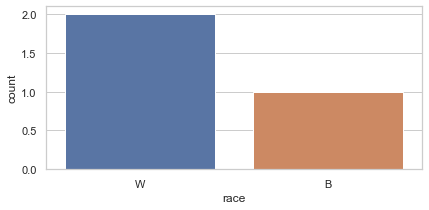

In [27]:
# Диаграмма распределения, пострадавших во время перестрелок, людей старческого возраста, принадлежащих разным расам.

sns.countplot(x='race', data=old)

Наблюдения:
    
1. На удивление ВСЕ люди старческого возраста были вооружены пистолетом, 62.5% из которых проявляли высокий кровень агрессии по отношению к окружающим людям;
2. 38.5% людей были с нарушениями психики;
3. 87.5% были мужчинами;
4. 66.7% состяавляли люди расы White non-Hispanic, оставшуюся часть составляют люди расы Black. 

Не смотря на большой возраст, люди этой группы были опасны для окружающих.

### Анализ основной группы жертв перестрелки за исключением детей до 12 лет

In [28]:
# Переведем информацию по датам из представления object в представление datetime64[ns]

data['date'] = pd.to_datetime(data['date'])

In [29]:
# Поскольку дети до 11 лет стали жертвами перестрелки случайно, эти данные я решила убрать из таблицы для дальнейшего анализа.

data = data.query('age > 11')

In [30]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [31]:
data.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
longitude                         float64
latitude                          float64
is_geocoding_exact                   bool
dtype: object

In [32]:
truncated_data = data[['gender', 'armed', 'race', 'signs_of_mental_illness', 'threat_level', 'manner_of_death']]
truncated_data.head()

,gender,armed,race,signs_of_mental_illness,threat_level,manner_of_death
0,M,gun,A,True,attack,shot
1,M,gun,W,False,attack,shot
2,M,unarmed,H,False,other,shot and Tasered
3,M,toy weapon,W,True,attack,shot
4,M,nail gun,H,False,attack,shot


In [33]:
ObJct = data[['gender', 'armed', 'race', 'signs_of_mental_illness', 'threat_level', 'manner_of_death']].describe().T
ObJct

,count,unique,top,freq
gender,7237,2,M,6905
armed,7038,102,gun,4138
race,6143,6,W,3145
signs_of_mental_illness,7243,2,False,5667
threat_level,7243,3,attack,4590
manner_of_death,7243,2,shot,6911


In [34]:
df=pd.DataFrame(ObJct,columns=["count", "freq", "ratio"])
values=df['freq']/df['count']*100
df["ratio"]=values
df

,count,freq,ratio
gender,7237,6905,95.412464
armed,7038,4138,58.795112
race,6143,3145,51.196484
signs_of_mental_illness,7243,5667,78.24106
threat_level,7243,4590,63.371531
manner_of_death,7243,6911,95.416264


<AxesSubplot:xlabel='race', ylabel='count'>

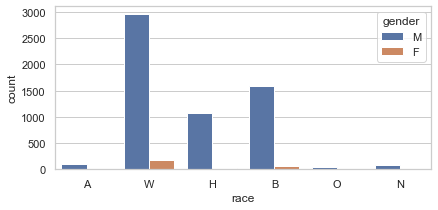

In [35]:
# Диаграмма распределения по расам людей, ставших жертвами во время перестрелок.

sns.countplot(x='race', data=data, hue='gender')

Наблюдения:
    
1. 95.4% пострадавшими в перестрелки были мужчины;
2. 58.8% были вооружены пистолетом;
3. 51.2% были люди расы White non-Hispanic. На втром месте по численности были люди рас Black и Hispanic; 
4. 78.2% были без признаков психического растройства;
5. 63.4% случаев проявляли высокий уровень агрессии.

In [36]:
# В таблице отсутствовали данные по гендерной принадлежность некоторых пострадавших. По имени частично можно восстановить эту информацию.

data.loc[(data.gender.isna())&(data.name=='Scout Schultz'),'gender']='M'
data.loc[(data.gender.isna())&(data.name=='Aerie Sadler'),'gender']='F'
data.loc[(data.gender.isna())&(data.name=='Larry Marquail Mixon'),'gender']='M'
data.loc[(data.gender.isna())&(data.name=='Kevin Colindres'),'gender']='M'
data.loc[(data.gender.isna())&(data.name=='Joseph Robert Henry Thompson'),'gender']='M'

In [37]:
data[data.gender.isna()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
7673,7674,NaN,2022-08-21,shot,vehicle,17.0,NaN,NaN,Greensboro,NC,False,attack,Car,False,-79.872,36.069,True


Наблюдения:

У одного пострадавшего гендерную принадлежность восстановть не удалось, поскольку отсутствует имя, по которому можно сориентироваться. 

In [38]:
# Имеет ли зависимость уровень угрозы со стороны жертвы перестрелки от ее гендерной принадлежности и выявленным психичсеким отклонениям?

pd.crosstab([data.signs_of_mental_illness,data.threat_level],data.gender,margins=True).style.background_gradient(cmap='summer_r')

Наблюдение:

Чаще всего высокий уровень угрозы (attack), по отношению к окружающим, имели люди женского и мужского пола без признаков психических отклонений.

In [39]:
# Распределим пострадавших по возрастным группам.

data['Age_band']=0
data.loc[data['age']<=18,'Age_band']=0
data.loc[(data['age']>18)&(data['age']<=36),'Age_band']=1
data.loc[(data['age']>36)&(data['age']<=54),'Age_band']=2
data.loc[(data['age']>72)&(data['age']<=91),'Age_band']=3
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,Age_band
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,1
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,1
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2


In [40]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,3736
2,2433
0,1001
3,73


Наблюдение:

Больше всего жертв было в возрасте от 18 до 36 лет, на втором месте группа в возрасте от 36 до 54 лет.

In [41]:
# Какое количество жертв в разных штатах страны? Топ 3 страны с самым высоким уровнем жертв и с самым низким.

data.groupby('state', as_index=False).agg({'id': 'count'}).sort_values('id', ascending=False).head()

,state,id
4,CA,1011
43,TX,628
9,FL,456
3,AZ,328
10,GA,286


In [42]:
data.groupby('state', as_index=False).agg({'id': 'count'}).sort_values('id', ascending=False).tail()

,state,id
41,SD,19
28,ND,18
8,DE,17
46,VT,13
39,RI,5


Наблюдения:

1. Наибольшее количество жерт в штатах: California (CA), Texas (TX), Florida (FL);
2. Меньше всего жертв перестрелок в штатах: Rhode Island (RI), Vermont (VT), Delaware (DE).

In [43]:
# Сколько человек пострадало во время перестрелок в каждый год по стране?

data.date.dt.year.value_counts()

2015    985
2020    968
2017    948
2016    936
2018    935
2019    932
2021    930
2022    609
Name: date, dtype: int64

Наблюдение:

В каждый год было застрелено во время перестрелок примерно одинаковое количество человек. Снижение убийств в 2022 году связано, скорее всего, с тем, что год еще не завершился.

In [44]:
# В каком штате/городе больше всего жертв?

data[['city', 'state']].describe().T

,count,unique,top,freq
city,7243,3025,Los Angeles,115
state,7243,51,CA,1011


Наблюдение:

Больше всего жертв перестрелок в штате Калифорния, в городе Лос-Анджелес.

### Рассмотрим отдельно штат Калифорния, в котором зафиксировано больше всего жертв

In [45]:
# Таблица с данными пострадавших в штате Калифорния.

CA_data = data[data['state'] == 'CA']
CA_data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,Age_band
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,1
10,11,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.0,M,W,Stockton,CA,False,attack,Not fleeing,False,-121.299,37.930,True,1
22,23,Brian Barbosa,2015-01-11,shot,gun,23.0,M,H,South Gate,CA,False,attack,Not fleeing,False,-118.183,33.951,True,1
35,36,Jose Ceja,2015-01-15,shot,knife,36.0,M,H,Fairfield,CA,True,other,Not fleeing,False,-121.997,38.266,True,1
38,39,Zaki Shinwary,2015-01-16,shot and Tasered,knife,48.0,M,O,Fremont,CA,False,other,Not fleeing,False,-122.060,37.588,True,2


In [46]:
CA_data['year'] = CA_data.date.dt.year
CA_data['month'] = CA_data.date.dt.month
CA_data['day'] = CA_data.date.dt.day
CA_data['day_name'] = CA_data.date.dt.day_name()

In [47]:
CA_data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,flee,body_camera,longitude,latitude,is_geocoding_exact,Age_band,year,month,day,day_name
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,...,Not fleeing,False,-122.422,37.763,True,1,2015,1,4,Sunday
10,11,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.0,M,W,Stockton,CA,...,Not fleeing,False,-121.299,37.930,True,1,2015,1,6,Tuesday
22,23,Brian Barbosa,2015-01-11,shot,gun,23.0,M,H,South Gate,CA,...,Not fleeing,False,-118.183,33.951,True,1,2015,1,11,Sunday
35,36,Jose Ceja,2015-01-15,shot,knife,36.0,M,H,Fairfield,CA,...,Not fleeing,False,-121.997,38.266,True,1,2015,1,15,Thursday
38,39,Zaki Shinwary,2015-01-16,shot and Tasered,knife,48.0,M,O,Fremont,CA,...,Not fleeing,False,-122.060,37.588,True,2,2015,1,16,Friday


In [48]:
# Люди какой расы пострадали во время перестрелок в штате Калифорния больше всего?

CA_data.groupby(['gender', 'race'])['id'].count()

gender  race
F       A         3
        B         8
        H        13
        O         1
        W        21
M       A        31
        B       152
        H       374
        N         4
        O         7
        W       239
Name: id, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

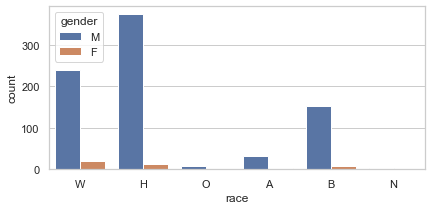

In [49]:
sns.countplot(x='race', data=CA_data, hue='gender')

Наблюдения:

1. Чаще всего жертвами перестрелок в штате Калифорния были мужчины расы Hispanic, на втором месте White, затем Black;
2. Женщины расы White чаще были жертвами перестрелок, на втором месте Hispanic.

<AxesSubplot:xlabel='day_name'>

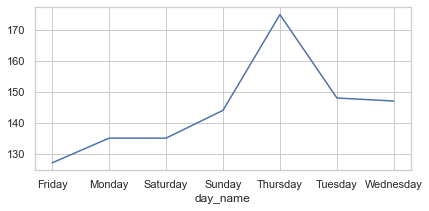

In [50]:
# В какой день недели больше всего жертв перестрелок в штате Калифорния?

CA_data.groupby('day_name')['id'].count().plot()

Наблюдение:

В среднем, больше всего жертв перестрелок по четвергам, меньше всего по пятницам.

<AxesSubplot:xlabel='year'>

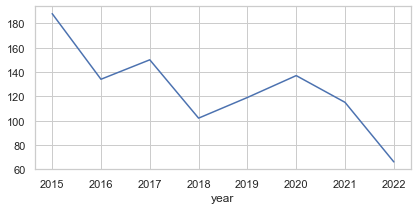

In [51]:
# Какая динамика численности жертв перестрелок по годам в штате Калифорния?

CA_data.groupby(['year'])['id'].count().plot()

Наблюдение:

1. Больше всего жертв перестрелок в штате Калифорния было зафиксировано в 2015 году;
2. Видна тенденция снижения количества жертв.

Результаты анализа данных:

    1. Среди пострадавших во время перестрелок выделяются три основные расовые группы: White non-Hispanic, Black и Hispanic;
    2. Среди пострадавших подросткового возраста (до 18 лет) есть расы Asian и Native American. Большая по численности группа пострадавших расы Black;
    3. Неожиданно, что люди старческого возраста (больше 85 лет) были вооружены и проявляли высокий уровень агрессии;
    4. Наиболее распространенный вид оружия - пистолет;
    5. В подавляющем большинстве случаев высокий уровень агрессии проявляли люди без признаков психический заболеваний;
    6. Наибольшее количество жертв перестрелок в штате Калифорния, Техас и Флорида;
    7. Меньше всего жертв перестрелок в штате Род-Айленд, Вермонт и Делавэр;
    8. Наибольшее количество жертв в городе Лос-Анджелес штата Калифорния;
    9. Больше всего пострадавших в штате Калифорния расы Hispanic;
    10. В штате Калифорния больше всего жертв по четвергам, меньше всего по пятницам;
    11. Больше всего жерт в штате Калифорния зафиксировано в 2015 году. Наблюдается снижение количества жертв к 2022 году.